# AVERAGE SCORE PREDICTOR

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway


In [121]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [122]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [123]:
df.shape

(1000, 8)

In [124]:
# Describing Numberical features
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [125]:
# Identify missing values to prepare for imputation or removal
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [126]:
df.dtypes.value_counts()

,count
object,5
int64,3


In [127]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print them
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Number of Numerical Columns:", len(numerical_cols))
print("Number of Categorical Columns:", len(categorical_cols))

Numerical Columns: ['math score', 'reading score', 'writing score']
Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Number of Numerical Columns: 3
Number of Categorical Columns: 5


In [128]:
# Unique Values
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [129]:
print("Gender Distribution:\n", df['gender'].value_counts(), "\n")
print("Race/Ethnicity Distribution:\n", df['race/ethnicity'].value_counts(), "\n")
print("Parental Education Level Distribution:\n", df['parental level of education'].value_counts(), "\n")
print("Lunch Type Distribution:\n", df['lunch'].value_counts(), "\n")
print("Test Preparation Course Distribution:\n", df['test preparation course'].value_counts(), "\n")

Gender Distribution:
 gender
female    518
male      482
Name: count, dtype: int64 

Race/Ethnicity Distribution:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

Parental Education Level Distribution:
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

Lunch Type Distribution:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

Test Preparation Course Distribution:
 test preparation course
none         642
completed    358
Name: count, dtype: int64 



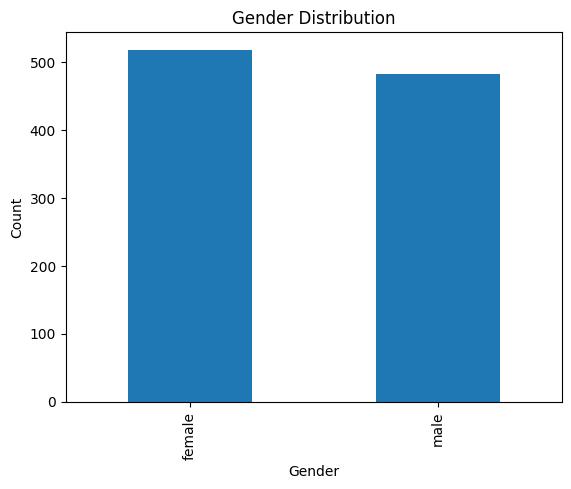

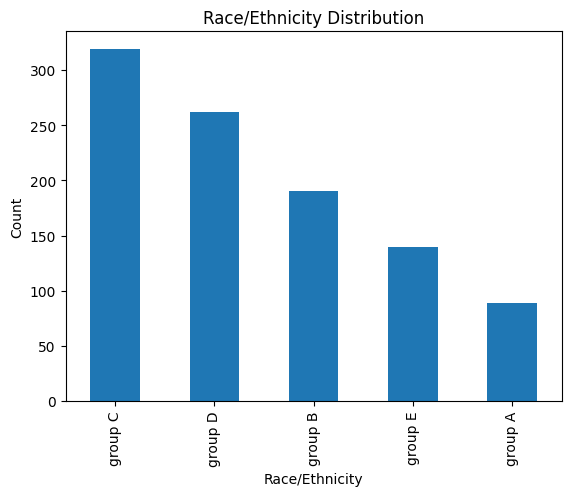

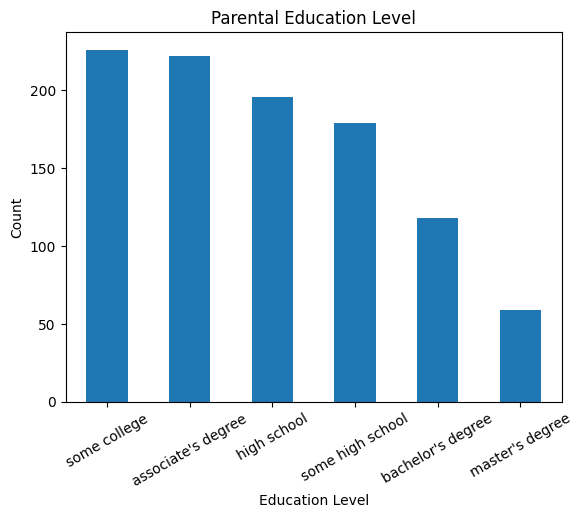

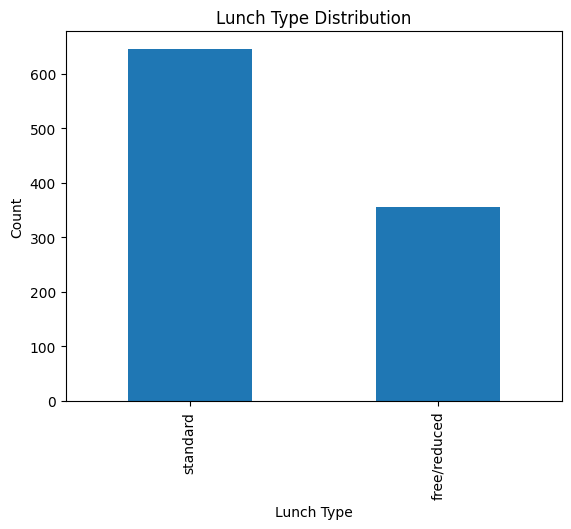

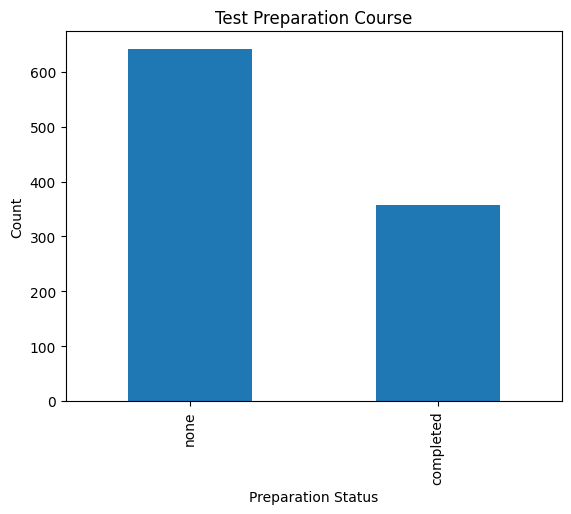

In [130]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/Ethnicity Distribution')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

df['parental level of education'].value_counts().plot(kind='bar', title='Parental Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

df['lunch'].value_counts().plot(kind='bar', title='Lunch Type Distribution')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.show()

df['test preparation course'].value_counts().plot(kind='bar', title='Test Preparation Course')
plt.xlabel('Preparation Status')
plt.ylabel('Count')
plt.show()


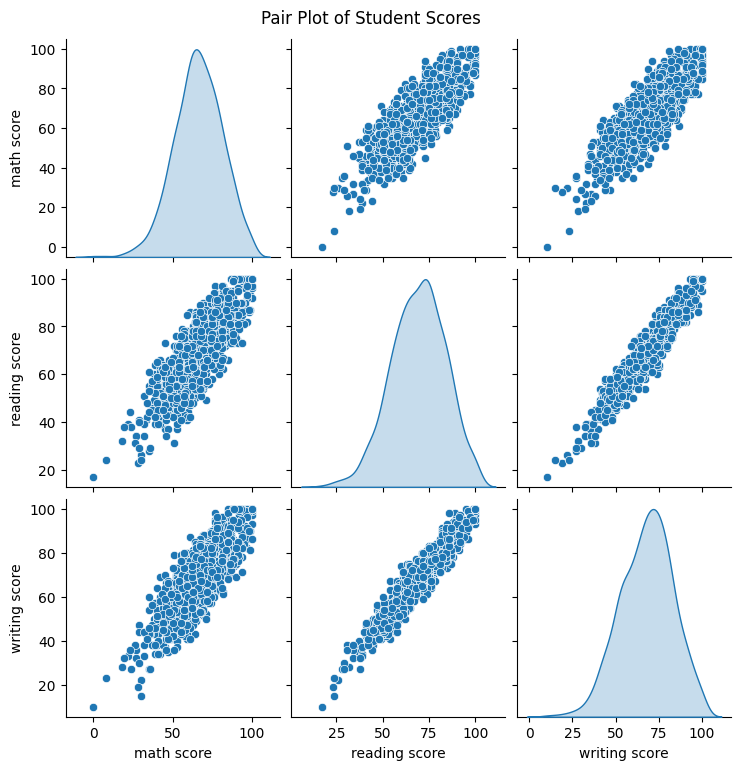

In [131]:
sns.pairplot(df[numerical_cols], diag_kind='kde')  # Use 'hist' instead of 'kde' if needed
plt.suptitle("Pair Plot of Student Scores", y=1.02)  # optional title
plt.show()

We observe a strong linear relationship among the numerical features, suggesting potential multicollinearity between math, reading, and writing scores.

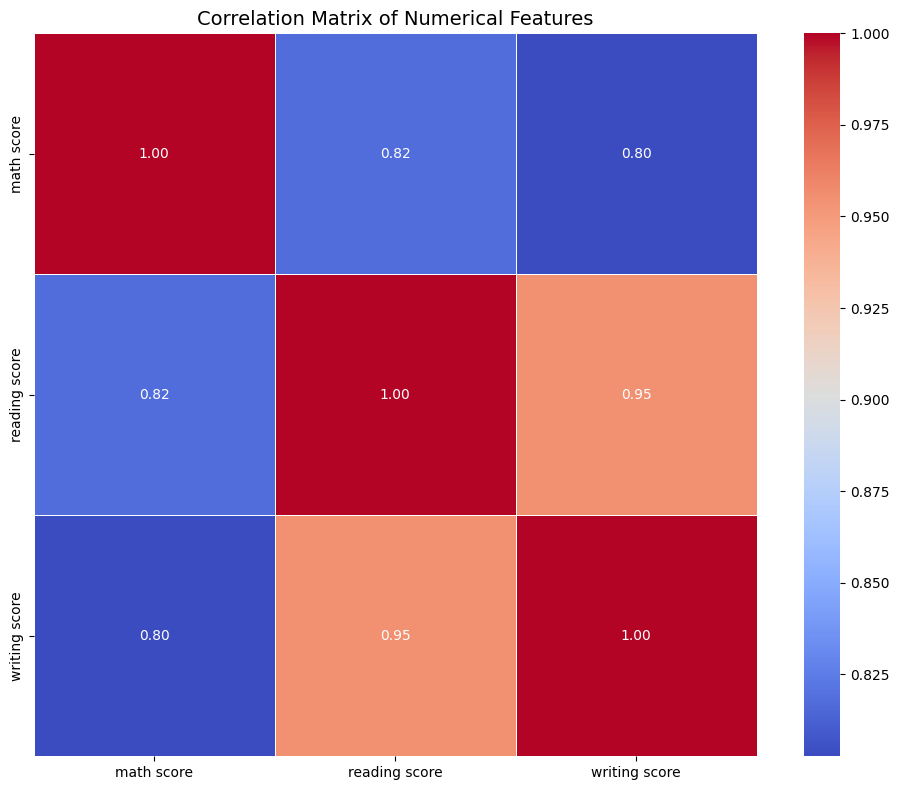

In [132]:
# Use only numerical columns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


In [134]:
target_scores = ['math score', 'reading score', 'writing score']

# Loop through each score to test impact of parental education
for score in target_scores:
    print(f"\n Testing impact on: {score}")

    # Create a list of groups based on parental education
    groups = [df[df['parental level of education'] == level][score]
              for level in df['parental level of education'].unique()]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)
    print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_val:.4f}")

    # Interpret the result
    if p_val < 0.05:
        print("Statistically significant: Parental education impacts this score.")
    else:
        print("Not statistically significant: No strong evidence for impact.")


 Testing impact on: math score
F-Statistic: 6.52, P-Value: 0.0000
Statistically significant: Parental education impacts this score.

 Testing impact on: reading score
F-Statistic: 9.29, P-Value: 0.0000
Statistically significant: Parental education impacts this score.

 Testing impact on: writing score
F-Statistic: 14.44, P-Value: 0.0000
Statistically significant: Parental education impacts this score.


In [135]:
# Ordinal encoding for 'parental level of education'
education_order = {
    "high school": 0,
    "some high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df['parental_edu_encoded'] = df['parental level of education'].map(education_order)


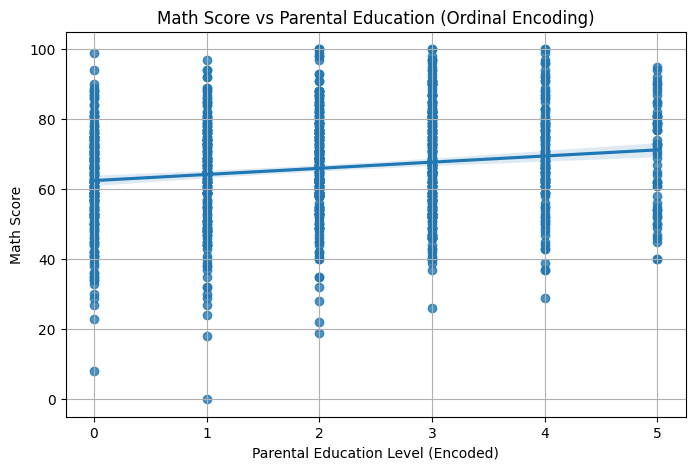

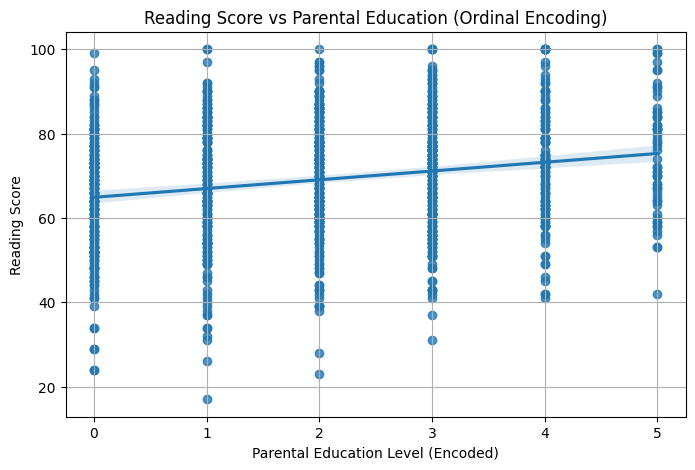

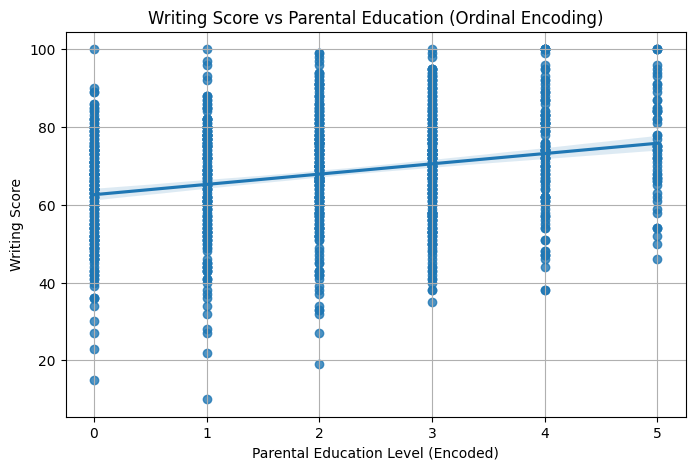

In [137]:
score_cols = ['math score', 'reading score', 'writing score']

# Plot for each score
for score in score_cols:
    plt.figure(figsize=(8, 5))
    sns.regplot(x='parental_edu_encoded', y=score, data=df)
    plt.title(f'{score.title()} vs Parental Education (Ordinal Encoding)')
    plt.xlabel('Parental Education Level (Encoded)')
    plt.ylabel(score.title())
    plt.grid(True)
    plt.show()

In [138]:
# Drop original column to avoid one-hot encoding it again
df = df.drop(columns='parental level of education')

# One-hot encode all other object-type columns
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [139]:
# Preview the final encoded dataset
print(df_encoded.head())
print("\nFinal Columns:", df_encoded.columns.tolist())

   math score  reading score  writing score  parental_edu_encoded  \
0          72             72             74                     4   
1          69             90             88                     2   
2          90             95             93                     5   
3          47             57             44                     3   
4          76             78             75                     2   

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  lunch_standard  \
0                   False                   False            True   
1                   False                   False 

Data Preprocessing and Exploratory Data Analysis (EDA):

- Conducted an ANOVA test to examine the impact of parental level of education on student performance. The results showed a statistically significant relationship (p-value < 0.05), justifying its inclusion as a meaningful feature.

- Applied ordinal encoding to the parental level of education column based on logical educational hierarchy.

- Performed one-hot encoding on the remaining categorical features (e.g., gender, race/ethnicity, lunch type, test preparation course).

- Visualized trends using a regression plot to confirm a positive correlation between higher parental education and better student scores.



In [147]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid = GridSearchCV(GradientBoostingRegressor(), params, cv=10, scoring='r2')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_


In [148]:
print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.937250890947999


In [151]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.1 MB/s eta 0:00:00


In [166]:
import pandas as pd
import numpy as np
import os
import joblib
import optuna
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, max_error
)
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [165]:
warnings.filterwarnings('ignore')

# Target Columns
target_cols = ['math score', 'reading score', 'writing score']

# Models Dictionary
models = {
    'GradientBoosting': GradientBoostingRegressor,
    'RandomForest': RandomForestRegressor,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'SVR': SVR,
    'DecisionTree': DecisionTreeRegressor,
    'XGBoost': xgb.XGBRegressor
}

# Results Stored in list
results = []
saved_models_info = []

# Ensure directory for saved models
os.makedirs("best_saved_models", exist_ok=True)

# Main Loop per Target
for target in target_cols:
    print(f"\nTarget: {target}")

    # Prepare X and y
    X = df_encoded.drop(columns=[target])
    y = df_encoded[target]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    best_r2 = -np.inf
    best_model = None
    best_model_name = ""
    best_params = {}
    best_metrics = {}

    # --- Loop through all models ---
    for model_name, model_class in models.items():
        print(f"\n🔍 Optimizing {model_name}...")

        def objective(trial):
            if model_name == 'GradientBoosting':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 10),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
                }
            elif model_name == 'RandomForest':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                    'max_depth': trial.suggest_int('max_depth', 2, 20),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
                }
            elif model_name in ['Ridge', 'Lasso']:
                params = {'alpha': trial.suggest_float('alpha', 0.001, 10.0, log=True)}
            elif model_name == 'SVR':
                params = {
                    'C': trial.suggest_float('C', 0.1, 10.0),
                    'epsilon': trial.suggest_float('epsilon', 0.01, 1.0)
                }
            elif model_name == 'DecisionTree':
                params = {
                    'max_depth': trial.suggest_int('max_depth', 2, 20),
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
                }
            elif model_name == 'XGBoost':
                params = {
                    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
                    'max_depth': trial.suggest_int('max_depth', 2, 10)
                }

            model = model_class(**params)
            scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
            return scores.mean()

        # Run optimization
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=50, timeout=180)

        # Final model training
        tuned_params = study.best_params
        model = model_class(**tuned_params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        metrics = {
            'R²': r2_score(y_test, y_pred),
            'CV R²': cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean(),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAE': mean_absolute_error(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'Max Error': max_error(y_test, y_pred)
        }

        # Store result
        results.append({
            'Target': target,
            'Model': model_name,
            **{k: round(v, 4) for k, v in metrics.items()},
            'Best Parameters': tuned_params
        })

        print(f"  ✔ Test R²: {metrics['R²']:.4f}")

        # Update best model
        if metrics['R²'] > best_r2:
            best_r2 = metrics['R²']
            best_model = model
            best_model_name = model_name
            best_params = tuned_params
            best_metrics = metrics

    # Save best model for this target
    model_file = f"best_saved_models/{target.replace(' ', '_')}_{best_model_name}.pkl"
    joblib.dump(best_model, model_file)
    print(f" Saved best model: {model_file}")

    # Track saved model info
    saved_models_info.append({
        'Target': target,
        'Model': best_model_name,
        'Model File': model_file,
        **{k: round(v, 4) for k, v in best_metrics.items()},
        'Best Parameters': best_params
    })

# --- Final Summary DataFrames ---
results_df = pd.DataFrame(results)
results_df.sort_values(by=['Target', 'R²'], ascending=[True, False], inplace=True)

saved_models_df = pd.DataFrame(saved_models_info)

# --- Save CSVs ---
results_df.to_csv("all_models_results.csv", index=False)
saved_models_df.to_csv("saved_best_models_info.csv", index=False)

# --- Output Summary ---
print("\n All model results saved to 'all_models_results.csv'")
print(" Best model details saved to 'saved_best_models_info.csv'")
print("\n Best Model per Target:")
print(saved_models_df[['Target', 'Model', 'R²', 'CV R²', 'RMSE', 'MAE', 'MSE', 'Max Error', 'Best Parameters']])


[I 2025-06-20 17:36:52,507] A new study created in memory with name: no-name-8fd77da1-d8e9-4d78-b620-b2052dd681b1



🎯 Target: math score

🔍 Optimizing GradientBoosting...


[I 2025-06-20 17:36:57,016] Trial 0 finished with value: 0.7838766883131283 and parameters: {'n_estimators': 286, 'learning_rate': 0.34419071874200063, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7838766883131283.
[I 2025-06-20 17:36:59,282] Trial 1 finished with value: 0.82658274159324 and parameters: {'n_estimators': 225, 'learning_rate': 0.19032244553375846, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.82658274159324.
[I 2025-06-20 17:37:03,949] Trial 2 finished with value: 0.8395555588319367 and parameters: {'n_estimators': 443, 'learning_rate': 0.23293556457777018, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8395555588319367.
[I 2025-06-20 17:37:05,257] Trial 3 finished with value: 0.8510373524906119 and parameters: {'n_estimators': 70, 'learning_rate': 0.15630880447158754, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 

  ✔ Test R²: 0.8731

🔍 Optimizing RandomForest...


[I 2025-06-20 17:38:00,742] Trial 0 finished with value: 0.8396577508444697 and parameters: {'n_estimators': 155, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8396577508444697.
[I 2025-06-20 17:38:01,608] Trial 1 finished with value: 0.8412166732662459 and parameters: {'n_estimators': 81, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8412166732662459.
[I 2025-06-20 17:38:05,737] Trial 2 finished with value: 0.8410929892433755 and parameters: {'n_estimators': 346, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8412166732662459.
[I 2025-06-20 17:38:08,584] Trial 3 finished with value: 0.8389753841805536 and parameters: {'n_estimators': 193, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8412166732662459.
[I 2025-06-20 17:38:13,518] Trial 4 finished with value: 0.8425591011946963 and parameters:

  ✔ Test R²: 0.8558

🔍 Optimizing Ridge...


[I 2025-06-20 17:41:08,684] Trial 11 finished with value: 0.8699403001592678 and parameters: {'alpha': 0.045186415982588116}. Best is trial 7 with value: 0.8699403016878392.
[I 2025-06-20 17:41:08,705] Trial 12 finished with value: 0.8699403010106425 and parameters: {'alpha': 0.04184872461930428}. Best is trial 7 with value: 0.8699403016878392.
[I 2025-06-20 17:41:08,727] Trial 13 finished with value: 0.8699403009742577 and parameters: {'alpha': 0.027338369717305685}. Best is trial 7 with value: 0.8699403016878392.
[I 2025-06-20 17:41:08,748] Trial 14 finished with value: 0.8699390852348525 and parameters: {'alpha': 0.32831641320702315}. Best is trial 7 with value: 0.8699403016878392.
[I 2025-06-20 17:41:08,771] Trial 15 finished with value: 0.8699280779399803 and parameters: {'alpha': 0.989780951198024}. Best is trial 7 with value: 0.8699403016878392.
[I 2025-06-20 17:41:08,792] Trial 16 finished with value: 0.8699402977072657 and parameters: {'alpha': 0.017953763405989535}. Best is t

  ✔ Test R²: 0.8811

🔍 Optimizing Lasso...


[I 2025-06-20 17:41:09,769] Trial 9 finished with value: 0.8695713295809793 and parameters: {'alpha': 0.09194200585113917}. Best is trial 2 with value: 0.8699907020343074.
[I 2025-06-20 17:41:09,792] Trial 10 finished with value: 0.8513647034368077 and parameters: {'alpha': 0.7625499412621882}. Best is trial 2 with value: 0.8699907020343074.
[I 2025-06-20 17:41:09,814] Trial 11 finished with value: 0.8699842339492518 and parameters: {'alpha': 0.0176463721015442}. Best is trial 2 with value: 0.8699907020343074.
[I 2025-06-20 17:41:09,843] Trial 12 finished with value: 0.8699826624747218 and parameters: {'alpha': 0.016525841756561244}. Best is trial 2 with value: 0.8699907020343074.
[I 2025-06-20 17:41:09,866] Trial 13 finished with value: 0.8649386735453793 and parameters: {'alpha': 0.3505290882652829}. Best is trial 2 with value: 0.8699907020343074.
[I 2025-06-20 17:41:09,890] Trial 14 finished with value: 0.8699849444827524 and parameters: {'alpha': 0.031185252841210362}. Best is tria

  ✔ Test R²: 0.8816

🔍 Optimizing SVR...


[I 2025-06-20 17:41:11,098] Trial 1 finished with value: 0.8108169042821958 and parameters: {'C': 3.0880903917997635, 'epsilon': 0.6205703694050835}. Best is trial 0 with value: 0.8219921772585496.
[I 2025-06-20 17:41:11,279] Trial 2 finished with value: 0.7815696914103184 and parameters: {'C': 1.8492058844059747, 'epsilon': 0.049295129127043785}. Best is trial 0 with value: 0.8219921772585496.
[I 2025-06-20 17:41:11,439] Trial 3 finished with value: 0.7103857772285506 and parameters: {'C': 0.887530530421385, 'epsilon': 0.21059193846111998}. Best is trial 0 with value: 0.8219921772585496.
[I 2025-06-20 17:41:11,603] Trial 4 finished with value: 0.8168258733154193 and parameters: {'C': 3.6033669767630503, 'epsilon': 0.8333439611002021}. Best is trial 0 with value: 0.8219921772585496.
[I 2025-06-20 17:41:11,799] Trial 5 finished with value: 0.8340411651286039 and parameters: {'C': 6.420194428656583, 'epsilon': 0.17035270256278034}. Best is trial 5 with value: 0.8340411651286039.
[I 2025-

  ✔ Test R²: 0.8343

🔍 Optimizing DecisionTree...


[I 2025-06-20 17:41:22,394] Trial 9 finished with value: 0.7821717052319611 and parameters: {'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8010087818069653.
[I 2025-06-20 17:41:22,431] Trial 10 finished with value: 0.7541704803751992 and parameters: {'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8010087818069653.
[I 2025-06-20 17:41:22,469] Trial 11 finished with value: 0.7984604493445084 and parameters: {'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8010087818069653.
[I 2025-06-20 17:41:22,505] Trial 12 finished with value: 0.6956654293983489 and parameters: {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8010087818069653.
[I 2025-06-20 17:41:22,545] Trial 13 finished with value: 0.7839123753319619 and parameters: {'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 w

  ✔ Test R²: 0.8191

🔍 Optimizing XGBoost...


[I 2025-06-20 17:41:24,585] Trial 0 finished with value: 0.7808773040771484 and parameters: {'n_estimators': 446, 'learning_rate': 0.4353501604607557, 'max_depth': 4}. Best is trial 0 with value: 0.7808773040771484.
[I 2025-06-20 17:41:25,125] Trial 1 finished with value: 0.8466724276542663 and parameters: {'n_estimators': 500, 'learning_rate': 0.04637422298146747, 'max_depth': 3}. Best is trial 1 with value: 0.8466724276542663.
[I 2025-06-20 17:41:25,653] Trial 2 finished with value: 0.7969561457633972 and parameters: {'n_estimators': 216, 'learning_rate': 0.4512969648552199, 'max_depth': 6}. Best is trial 1 with value: 0.8466724276542663.
[I 2025-06-20 17:41:26,196] Trial 3 finished with value: 0.7912857413291932 and parameters: {'n_estimators': 224, 'learning_rate': 0.49296387582906304, 'max_depth': 8}. Best is trial 1 with value: 0.8466724276542663.
[I 2025-06-20 17:41:26,710] Trial 4 finished with value: 0.8303149938583374 and parameters: {'n_estimators': 383, 'learning_rate': 0.0

  ✔ Test R²: 0.8681
💾 Saved best model: best_saved_models/math_score_Lasso.pkl

🎯 Target: reading score

🔍 Optimizing GradientBoosting...


[I 2025-06-20 17:41:47,351] Trial 0 finished with value: 0.873254205234085 and parameters: {'n_estimators': 181, 'learning_rate': 0.29553491852259145, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.873254205234085.
[I 2025-06-20 17:41:47,825] Trial 1 finished with value: 0.9094521259686074 and parameters: {'n_estimators': 93, 'learning_rate': 0.270483029763582, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9094521259686074.
[I 2025-06-20 17:41:48,574] Trial 2 finished with value: 0.8979115781994192 and parameters: {'n_estimators': 89, 'learning_rate': 0.059448261533344364, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9094521259686074.
[I 2025-06-20 17:41:49,308] Trial 3 finished with value: 0.8831022218610652 and parameters: {'n_estimators': 69, 'learning_rate': 0.13069960210005643, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4

  ✔ Test R²: 0.9141

🔍 Optimizing RandomForest...


[I 2025-06-20 17:43:29,372] Trial 0 finished with value: 0.9068592088575917 and parameters: {'n_estimators': 399, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9068592088575917.
[I 2025-06-20 17:43:30,340] Trial 1 finished with value: 0.8498152372994017 and parameters: {'n_estimators': 128, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9068592088575917.
[I 2025-06-20 17:43:32,610] Trial 2 finished with value: 0.8509299041832996 and parameters: {'n_estimators': 309, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9068592088575917.
[I 2025-06-20 17:43:38,262] Trial 3 finished with value: 0.9082439680033042 and parameters: {'n_estimators': 453, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.9082439680033042.
[I 2025-06-20 17:43:42,500] Trial 4 finished with value: 0.9078073785834949 and parameters: 

  ✔ Test R²: 0.9067

🔍 Optimizing Ridge...


[I 2025-06-20 17:46:29,877] Trial 8 finished with value: 0.9244086688353661 and parameters: {'alpha': 0.08257259157468741}. Best is trial 0 with value: 0.9244112952248486.
[I 2025-06-20 17:46:29,903] Trial 9 finished with value: 0.9244074254322051 and parameters: {'alpha': 0.0073542655235386035}. Best is trial 0 with value: 0.9244112952248486.
[I 2025-06-20 17:46:29,937] Trial 10 finished with value: 0.9244105997818103 and parameters: {'alpha': 1.0241841559700393}. Best is trial 0 with value: 0.9244112952248486.
[I 2025-06-20 17:46:29,971] Trial 11 finished with value: 0.924412703701061 and parameters: {'alpha': 0.5538518823991747}. Best is trial 11 with value: 0.924412703701061.
[I 2025-06-20 17:46:30,008] Trial 12 finished with value: 0.9244113513226868 and parameters: {'alpha': 0.9464756352288358}. Best is trial 11 with value: 0.924412703701061.
[I 2025-06-20 17:46:30,036] Trial 13 finished with value: 0.9244031905224398 and parameters: {'alpha': 1.476810726118635}. Best is trial 11

  ✔ Test R²: 0.9165

🔍 Optimizing Lasso...


[I 2025-06-20 17:46:31,367] Trial 8 finished with value: 0.9097603249996368 and parameters: {'alpha': 1.2486266759759075}. Best is trial 2 with value: 0.9244498616053898.
[I 2025-06-20 17:46:31,390] Trial 9 finished with value: 0.9244134648490986 and parameters: {'alpha': 0.01316358078507345}. Best is trial 2 with value: 0.9244498616053898.
[I 2025-06-20 17:46:31,420] Trial 10 finished with value: 0.9244073565199024 and parameters: {'alpha': 0.0013198824324555886}. Best is trial 2 with value: 0.9244498616053898.
[I 2025-06-20 17:46:31,449] Trial 11 finished with value: 0.9244097772200419 and parameters: {'alpha': 0.04467627210236237}. Best is trial 2 with value: 0.9244498616053898.
[I 2025-06-20 17:46:31,479] Trial 12 finished with value: 0.9244451373735965 and parameters: {'alpha': 0.028766104428072054}. Best is trial 2 with value: 0.9244498616053898.
[I 2025-06-20 17:46:31,507] Trial 13 finished with value: 0.920673592016669 and parameters: {'alpha': 0.30014848383323395}. Best is tri

  ✔ Test R²: 0.9172

🔍 Optimizing SVR...


[I 2025-06-20 17:46:32,984] Trial 0 finished with value: 0.8976124789130011 and parameters: {'C': 6.854266899983102, 'epsilon': 0.31832324992186284}. Best is trial 0 with value: 0.8976124789130011.
[I 2025-06-20 17:46:33,201] Trial 1 finished with value: 0.8989038321435514 and parameters: {'C': 7.958360446213609, 'epsilon': 0.6890295416138777}. Best is trial 1 with value: 0.8989038321435514.
[I 2025-06-20 17:46:33,402] Trial 2 finished with value: 0.8995536268493438 and parameters: {'C': 9.344704450689564, 'epsilon': 0.9722090025234058}. Best is trial 2 with value: 0.8995536268493438.
[I 2025-06-20 17:46:33,569] Trial 3 finished with value: 0.8809008202937946 and parameters: {'C': 3.409401825322751, 'epsilon': 0.8209019813428355}. Best is trial 2 with value: 0.8995536268493438.
[I 2025-06-20 17:46:33,772] Trial 4 finished with value: 0.8998516396866828 and parameters: {'C': 8.460394433375763, 'epsilon': 0.4904781105110215}. Best is trial 4 with value: 0.8998516396866828.
[I 2025-06-20 

  ✔ Test R²: 0.8638

🔍 Optimizing DecisionTree...


[I 2025-06-20 17:46:44,719] Trial 5 finished with value: 0.8497869068063473 and parameters: {'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.8806248024852972.
[I 2025-06-20 17:46:44,764] Trial 6 finished with value: 0.8758964059998539 and parameters: {'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.8806248024852972.
[I 2025-06-20 17:46:44,806] Trial 7 finished with value: 0.8754935952301824 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.8806248024852972.
[I 2025-06-20 17:46:44,842] Trial 8 finished with value: 0.8637609486634364 and parameters: {'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.8806248024852972.
[I 2025-06-20 17:46:44,887] Trial 9 finished with value: 0.8285475436949283 and parameters: {'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 4 w

  ✔ Test R²: 0.8925

🔍 Optimizing XGBoost...


[I 2025-06-20 17:46:47,350] Trial 0 finished with value: 0.879564905166626 and parameters: {'n_estimators': 437, 'learning_rate': 0.16396551597710668, 'max_depth': 5}. Best is trial 0 with value: 0.879564905166626.
[I 2025-06-20 17:46:47,750] Trial 1 finished with value: 0.8755438923835754 and parameters: {'n_estimators': 259, 'learning_rate': 0.3401303853923908, 'max_depth': 4}. Best is trial 0 with value: 0.879564905166626.
[I 2025-06-20 17:46:48,391] Trial 2 finished with value: 0.870534884929657 and parameters: {'n_estimators': 474, 'learning_rate': 0.29824009180632244, 'max_depth': 4}. Best is trial 0 with value: 0.879564905166626.
[I 2025-06-20 17:46:48,841] Trial 3 finished with value: 0.9019410371780395 and parameters: {'n_estimators': 394, 'learning_rate': 0.08145749311583403, 'max_depth': 3}. Best is trial 3 with value: 0.9019410371780395.
[I 2025-06-20 17:46:49,507] Trial 4 finished with value: 0.8787498831748962 and parameters: {'n_estimators': 466, 'learning_rate': 0.46868

  ✔ Test R²: 0.9129
💾 Saved best model: best_saved_models/reading_score_Lasso.pkl

🎯 Target: writing score

🔍 Optimizing GradientBoosting...


[I 2025-06-20 17:47:19,826] Trial 0 finished with value: 0.9244035142111233 and parameters: {'n_estimators': 410, 'learning_rate': 0.061337153858077524, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9244035142111233.
[I 2025-06-20 17:47:24,916] Trial 1 finished with value: 0.9083833875868434 and parameters: {'n_estimators': 475, 'learning_rate': 0.41252932124591124, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9244035142111233.
[I 2025-06-20 17:47:25,643] Trial 2 finished with value: 0.9245770116933955 and parameters: {'n_estimators': 91, 'learning_rate': 0.28434917751745814, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9245770116933955.
[I 2025-06-20 17:47:26,396] Trial 3 finished with value: 0.9153501800296036 and parameters: {'n_estimators': 103, 'learning_rate': 0.43101925279693565, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_le

  ✔ Test R²: 0.9291

🔍 Optimizing RandomForest...


[I 2025-06-20 17:48:38,594] Trial 0 finished with value: 0.9274874774127584 and parameters: {'n_estimators': 435, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9274874774127584.
[I 2025-06-20 17:48:42,522] Trial 1 finished with value: 0.9256393706207391 and parameters: {'n_estimators': 397, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9274874774127584.
[I 2025-06-20 17:48:46,264] Trial 2 finished with value: 0.9182507682716226 and parameters: {'n_estimators': 396, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9274874774127584.
[I 2025-06-20 17:48:50,766] Trial 3 finished with value: 0.9263652225515548 and parameters: {'n_estimators': 379, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9274874774127584.
[I 2025-06-20 17:48:54,648] Trial 4 finished with value: 0.9280499688614519 and parameters: {'n

  ✔ Test R²: 0.9153

🔍 Optimizing Ridge...


[I 2025-06-20 17:51:11,297] Trial 10 finished with value: 0.9472244624656299 and parameters: {'alpha': 0.05327726706954713}. Best is trial 9 with value: 0.9472324104226717.
[I 2025-06-20 17:51:11,324] Trial 11 finished with value: 0.9472047034347053 and parameters: {'alpha': 6.631787905992998}. Best is trial 9 with value: 0.9472324104226717.
[I 2025-06-20 17:51:11,349] Trial 12 finished with value: 0.9472319555501134 and parameters: {'alpha': 2.798624059071384}. Best is trial 9 with value: 0.9472324104226717.
[I 2025-06-20 17:51:11,373] Trial 13 finished with value: 0.9472261617487614 and parameters: {'alpha': 0.29795167835030417}. Best is trial 9 with value: 0.9472324104226717.
[I 2025-06-20 17:51:11,396] Trial 14 finished with value: 0.9472242185470501 and parameters: {'alpha': 0.020494406270339174}. Best is trial 9 with value: 0.9472324104226717.
[I 2025-06-20 17:51:11,419] Trial 15 finished with value: 0.9472323926031692 and parameters: {'alpha': 2.1489903133443264}. Best is trial 

  ✔ Test R²: 0.9368

🔍 Optimizing Lasso...


[I 2025-06-20 17:51:12,472] Trial 9 finished with value: 0.6299142290480279 and parameters: {'alpha': 7.915281177701924}. Best is trial 5 with value: 0.9472408767268167.
[I 2025-06-20 17:51:12,501] Trial 10 finished with value: 0.9349388343716925 and parameters: {'alpha': 0.6578977199860874}. Best is trial 5 with value: 0.9472408767268167.
[I 2025-06-20 17:51:12,526] Trial 11 finished with value: 0.9472396053168133 and parameters: {'alpha': 0.011903232766621308}. Best is trial 5 with value: 0.9472408767268167.
[I 2025-06-20 17:51:12,551] Trial 12 finished with value: 0.9472430162096618 and parameters: {'alpha': 0.029823827684141234}. Best is trial 12 with value: 0.9472430162096618.
[I 2025-06-20 17:51:12,575] Trial 13 finished with value: 0.947226465254969 and parameters: {'alpha': 0.0010357920568483034}. Best is trial 12 with value: 0.9472430162096618.
[I 2025-06-20 17:51:12,611] Trial 14 finished with value: 0.9422914935933985 and parameters: {'alpha': 0.3851097544522564}. Best is tr

  ✔ Test R²: 0.9372

🔍 Optimizing SVR...


[I 2025-06-20 17:51:13,898] Trial 1 finished with value: 0.917154828798094 and parameters: {'C': 4.277200108700047, 'epsilon': 0.5012428703464445}. Best is trial 1 with value: 0.917154828798094.
[I 2025-06-20 17:51:14,044] Trial 2 finished with value: 0.7987321322593981 and parameters: {'C': 0.5974515493728643, 'epsilon': 0.8770509816348051}. Best is trial 1 with value: 0.917154828798094.
[I 2025-06-20 17:51:14,195] Trial 3 finished with value: 0.8878626845026225 and parameters: {'C': 1.6499521266766426, 'epsilon': 0.9220231326900902}. Best is trial 1 with value: 0.917154828798094.
[I 2025-06-20 17:51:14,495] Trial 4 finished with value: 0.9270306885938844 and parameters: {'C': 8.753300866553094, 'epsilon': 0.3246003408182415}. Best is trial 4 with value: 0.9270306885938844.
[I 2025-06-20 17:51:14,854] Trial 5 finished with value: 0.9280360536012857 and parameters: {'C': 8.709583702260295, 'epsilon': 0.8947010384981301}. Best is trial 5 with value: 0.9280360536012857.
[I 2025-06-20 17:

  ✔ Test R²: 0.8885

🔍 Optimizing DecisionTree...


[I 2025-06-20 17:51:25,324] Trial 7 finished with value: 0.8904551408023982 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 5 with value: 0.8994030608409324.
[I 2025-06-20 17:51:25,352] Trial 8 finished with value: 0.8998995209073575 and parameters: {'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 8 with value: 0.8998995209073575.
[I 2025-06-20 17:51:25,377] Trial 9 finished with value: 0.9009234981434726 and parameters: {'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 9 with value: 0.9009234981434726.
[I 2025-06-20 17:51:25,421] Trial 10 finished with value: 0.8760768693463314 and parameters: {'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 9 with value: 0.9009234981434726.
[I 2025-06-20 17:51:25,460] Trial 11 finished with value: 0.9004531346170312 and parameters: {'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 9 w

  ✔ Test R²: 0.8682

🔍 Optimizing XGBoost...


[I 2025-06-20 17:51:28,959] Trial 0 finished with value: 0.9361393570899963 and parameters: {'n_estimators': 235, 'learning_rate': 0.03944560151594414, 'max_depth': 3}. Best is trial 0 with value: 0.9361393570899963.
[I 2025-06-20 17:51:29,815] Trial 1 finished with value: 0.920001769065857 and parameters: {'n_estimators': 373, 'learning_rate': 0.29862770661125804, 'max_depth': 7}. Best is trial 0 with value: 0.9361393570899963.
[I 2025-06-20 17:51:31,492] Trial 2 finished with value: 0.9153370141983033 and parameters: {'n_estimators': 376, 'learning_rate': 0.11166460120094375, 'max_depth': 9}. Best is trial 0 with value: 0.9361393570899963.
[I 2025-06-20 17:51:32,273] Trial 3 finished with value: 0.9171876430511474 and parameters: {'n_estimators': 397, 'learning_rate': 0.2927078794421949, 'max_depth': 8}. Best is trial 0 with value: 0.9361393570899963.
[I 2025-06-20 17:51:32,528] Trial 4 finished with value: 0.9367100477218628 and parameters: {'n_estimators': 210, 'learning_rate': 0.1

  ✔ Test R²: 0.9285
💾 Saved best model: best_saved_models/writing_score_Lasso.pkl

✅ All model results saved to 'all_models_results.csv'
✅ Best model details saved to 'saved_best_models_info.csv'

🏆 Best Model per Target:
          Target  Model      R²   CV R²    RMSE     MAE      MSE  Max Error  \
0     math score  Lasso  0.8816  0.8725  5.3686  4.1918  28.8223    15.1939   
1  reading score  Lasso  0.9172  0.9234  4.3289  3.4838  18.7394    11.7914   
2  writing score  Lasso  0.9372  0.9454  3.8915  3.2194  15.1437    11.0725   

                   Best Parameters  
0  {'alpha': 0.027521833307084007}  
1   {'alpha': 0.02518540832281691}  
2  {'alpha': 0.025289182593153648}  
